In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

***

 ### Step 1: Loading and Preprocessing the Data
---
Read the CSV file and save it in a temporary dataframe.    
To further safeguard patient privacy, the data has been subjected to extra deidentification prior to importing.

In [2]:
temp_df = pd.read_csv("ckd_deidentified.csv")

### Renaming Columns and Setting Index
---
* Rename the column "Unnamed: 0" to "instance" in the temporary dataframe.
* Set the "instance" column as the index of the dataframe.
* Remove the index name to improve clarity.
* Create a new dataframe, "df," as a copy of the temporary dataframe.

In [3]:
temp_df.rename(columns={"Unnamed: 0": "instance"}, inplace = True)
temp_df.set_index('instance', inplace = True)
temp_df.index.name = None
df = temp_df.copy()


### Displaying DataFrame Information
---
This next code snippet provides various insights and information about the DataFrame:    

* Displaying the First Five Lines:    
    The first five lines of the dataframe are printed.
   
* Displaying DataFrame Columns:    
    The names of the columns in the dataframe are printed.
   
* Displaying Column Data Types:    
    The data types of the columns in the dataframe are printed.
   
* Displaying DataFrame Shape:    
    The number of rows and columns in the dataframe are printed.
   
* Displaying Summary Statistics:    
    Summary statistics for the numerical columns in the dataframe are printed, rounded to two decimal places.
   
* Displaying Gender Distribution:    
    The distribution of genders in the dataframe is printed as a percentage, rounded to five decimal places.    

These lines of code help provide an overview of the dataframe's content, structure, and statistical information.

In [4]:
print(f"\033[1mThe first five lines are:\033[0m\n\n{df.head()}\n")
print(f"\033[1mThe DataFrame columns are:\033[0m\n\n{df.columns}\n")
print(f"\033[1mThe column data types are:\033[0m\n\n{df.dtypes}\n")
print(f"\033[1mThe dataframe has\033[0m {df.shape[0]} \033[1mlines and\033[0m {df.shape[1]} \033[1mcolumns\033[0m\n")
print(f"\033[1mThe summary statistics for the numerical columns are:\033[0m\n\n{df.describe().round(2)}\n")
print(f"\033[1mThe gender distribution is:\033[0m\n\n{(df['gender'].value_counts(normalize=True).round(2) * 100).apply(lambda x: f'{x}%')}\n")

The first five lines are:

                                                    hematocrit  hemoglobin  \
0000003c42d42886f0512786c8cef89336c3dbc4a25e5dd...        25.3         8.5   
00000727efa061858c1e6611657af5b6defd0ab071091a0...        28.6        10.0   
00002d1472769d21c156977f93e2e1db0557807f470e08a...        31.7        10.1   
00004622a4c6b7bb6b873558488dd2e828dc77a5d9587f6...        37.8        12.4   
00004741d15bcf0f0453f94cdd9eeb85c663584f26c5fe0...        23.1         7.8   

                                                     mch  mchc   mcv  \
0000003c42d42886f0512786c8cef89336c3dbc4a25e5dd...  28.6  33.4  86.0   
00000727efa061858c1e6611657af5b6defd0ab071091a0...  29.8  34.9  85.0   
00002d1472769d21c156977f93e2e1db0557807f470e08a...  28.2  31.9  88.0   
00004622a4c6b7bb6b873558488dd2e828dc77a5d9587f6...  31.1  32.9  95.0   
00004741d15bcf0f0453f94cdd9eeb85c663584f26c5fe0...  28.7  33.7  85.0   

                                                    platelet   rbc   rd

---

### Calculating Missing and Duplicate Values
---
This code snippet calculates and displays the following information about the dataframe:

* Calculating Percentage of Missing Values:    
    The percentage of missing values in each column is calculated and rounded to three decimal places.
   
* Calculating Percentage of Duplicate Values:    
    The percentage of duplicate rows is calculated and rounded to two decimal places. 

These lines of code provide insights into the presence of missing values and duplicates within the dataframe.

In [5]:
missing_values_percentage = (df.isnull().mean()*100).round(3).apply(lambda x: f'{x}%')
duplicates_count = (df.duplicated().mean()*100).round(2)

print(f"\033[1mThe percentage of missing values is:\033[0m\n\n{missing_values_percentage}\n")
print(f"\033[1mThe percentage of duplicate values is:\033[0m\n\n{duplicates_count}%")

The percentage of missing values is:

hematocrit        0.388%
hemoglobin         2.61%
mch                2.93%
mchc               2.92%
mcv               2.924%
platelet          2.318%
rbc               2.923%
rdw               2.992%
wbc               2.822%
albumin          84.284%
globulin         99.532%
total_protein     99.19%
aniongap          3.408%
bicarbonate       3.223%
bun               2.325%
calcium           16.12%
chloride          2.047%
creatinine        1.772%
glucose           4.234%
sodium            2.082%
potassium         1.306%
age                 0.0%
gender              0.0%
ckd                 0.0%
hypertension        0.0%
diabetes            0.0%
dtype: object

The percentage of duplicate values is:

0.0%


### Counting Rows with Serum Creatinine Equal to 0
----------------------------------------------------
This code snippet counts the number of rows in the dataframe where the 'creatinine' column has a value of 0.    
The egfr equation contains this part $\min\left( \frac{standardized\ Scr}{a},\ 1 \right)^{- 0.241}$.    
Thus in case of Scr equal to 0 we would need to raise 0 in a negative number (-0.241) which throws a ZeroDivisionError.
 
* Counting Rows with Serum Creatinine Equal to 0:    
    Rows in the dataframe where the 'creatinine' column is equal to 0 are counted.    
    The count is stored in the variable 'creatinine_0' as a list and the calculated percentage is printed.

In [6]:
creatinine_0 = df[df['creatinine'] == 0]['creatinine'].value_counts().to_list()
if len(creatinine_0) > 0:
    percentage = round((100 * creatinine_0[0] / len(df)), 5)
    print(f"\033[1mThe percentage of indexes with creatinine equal to 0 is\033[0m {percentage}%")
else:
    print("\033[1mNo indexes with creatinine equal to 0 found.\033[0m")

No indexes with creatinine equal to 0 found.


### Data Cleaning Operations
---
This code snippet performs various data cleaning operations on the dataframe:

* Removing Rows and columns with Missing Values:    
    The columns albumin, globulin and total protein have an high percentage of missing values and will be droped.
    All rows with missing values are droped as well.
   
* Removing Duplicate Rows:    
    There are no duplicate rows that need to be removed.
   
* Removing Rows with Serum Creatinine Equal to 0:    
    There are no rows where creatinine equals 0 that need to be removed.
    
These operations help ensure data quality and prepare the dataframe for further analysis.

In [7]:
df = df.drop(["albumin", "globulin", "total_protein"], axis=1)
df.dropna(axis=0, inplace=True)
# df.drop_duplicates(inplace=True)
# df = df[df['creatinine'] != 0].dropna()

In [9]:
print(f"\033[1mThe dataframe has\033[0m {df.shape[0]} \033[1mrows and\033[0m {df.shape[1]} \033[1mcolumns\033[0m\n")
print(f"\033[1mThe summary statistics for the numerical columns are:\033[0m\n\n{df.describe().round(2)}\n")
print(f"\033[1mThe gender distribution is:\033[0m\n\n{(df['gender'].value_counts(normalize=True).round(2) * 100).apply(lambda x: f'{x}%')}\n")

The dataframe has 1338774 rows and 23 columns

The summary statistics for the numerical columns are:

       hematocrit  hemoglobin         mch        mchc         mcv    platelet  \
count  1338774.00  1338774.00  1338774.00  1338774.00  1338774.00  1338774.00   
mean        31.04       10.15       29.81       32.69       91.24      226.79   
std          5.98        2.05        2.76        1.66        7.35      135.67   
min          4.30        1.30       12.30       22.00        8.00        5.00   
25%         26.40        8.50       28.40       31.60       87.00      140.00   
50%         30.40        9.90       30.00       32.70       91.00      208.00   
75%         35.10       11.50       31.40       33.80       95.00      289.00   
max         68.60       23.30       56.70       47.60      156.00     2669.00   

              rbc         rdw         wbc    aniongap  ...     calcium  \
count  1338774.00  1338774.00  1338774.00  1338774.00  ...  1338774.00   
mean         3.43   

### Gender distribution comparison

The gender has remained unchange after data cleaning. Check the bar plot that follows.

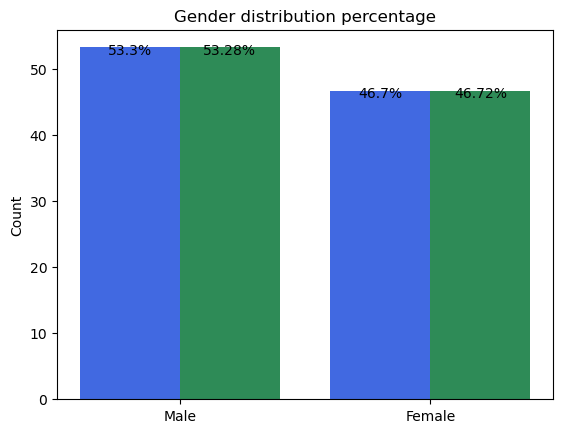

In [48]:
ind = np.arange(2)  # the x locations for the groups
width = 0.4      # the width of the bars

total_before = temp_df["gender"].value_counts().sum()
total_after = df["gender"].value_counts().sum()
before = temp_df["gender"].value_counts().to_list()
after = df["gender"].value_counts().to_list()
    
percentage_before = (100*(before/total_before)).round(2)
percentage_after = (100*(after/total_after)).round(2)

fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, percentage_before, width, color='royalblue')
rects2 = ax.bar(ind+width, percentage_after, width, color='seagreen')

# add names under each double bar
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(['Male', 'Female'])

# add labels to the bars
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height}%', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='top')
    
    
# add some
ax.set_ylabel('Count')
ax.set_title('Gender distribution percentage')

plt.show()

### Age histogram

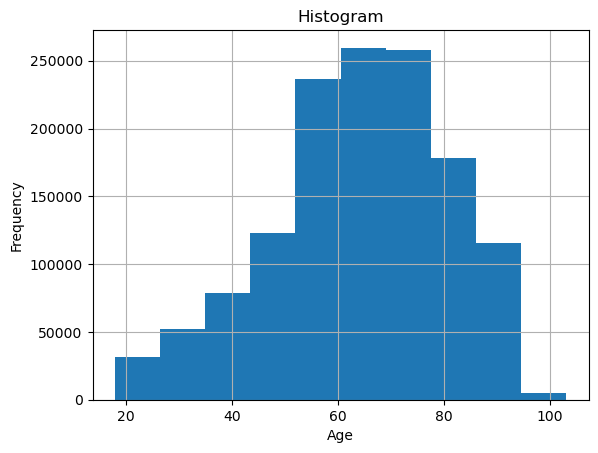

In [53]:
# Histogram
df['age'].hist(bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

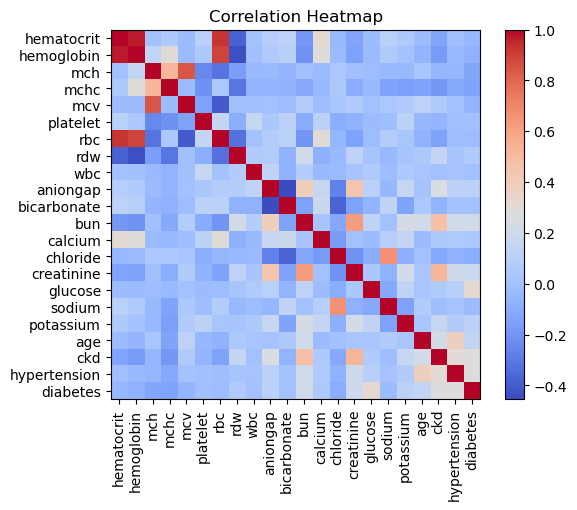

In [60]:
# Heatmap
correlation_matrix = df.corr(numeric_only=True)
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical', ha='center')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Heatmap')
plt.show()

### eGFR Calculation
***

The CKD-EPI(2021) eGFR equation differentiates depending on the patient gender. Based on the CKD-EPI(2021) equation from [kidney.org](https://www.kidney.org/professionals/kdoqi/gfr_calculator/formula) the gender specific equations are:    

$eGFR\_ female = 142*\min\left( \frac{standardized\ Scr}{0.7},\ 1 \right)^{- 0.241}*{\max\left( \frac{standardized\ Scr}{0.7},\ 1 \right)}^{- 1.2}*{0.9938}^{age}*1.012$    

  

$eGFR\_ male = 142*\min\left( \frac{standardized\ Scr}{0.9},\ 1 \right)^{- 0.302}*{\max\left( \frac{standardized\ Scr}{0.9},\ 1 \right)}^{- 1.2}*{0.9938}^{age}$    

---
This code snippet defines two functions to calculate the estimated glomerular filtration rate (eGFR) based on age and serum creatinine levels. The calculated eGFR is rounded to two decimal places and returned as the result:

* Equation for Females: egfr_f(age,s_cr).
* Equation for Males: egfr_m(age,s_cr).    

Where:    
**age** represents the age of the individual    
**s_cr** denotes the serum creatinine level

In [61]:
# For females
def egfr_f(age,s_cr):
    result = round(142 * pow(min((s_cr/0.7),1), -0.241) * pow(max((s_cr/0.7),1),-1.2) * pow(0.9938, age) * 1.012 , 2)
    return result

# For males
def egfr_m(age,s_cr):
    result = round(142 * pow(min((s_cr/0.9),1), -0.302) * pow(max((s_cr/0.9),1),-1.2) * pow(0.9938, age) , 2)
    return result

### Calculating eGFR for Each Row
---    
This code snippet calculates the estimated glomerular filtration rate (eGFR) for each row in the dataframe based on gender-specific equations and the values of 'age' and 'creatinine' columns.

1. Applying eGFR Calculation:
   - The `apply()` function is used to iterate over each row in the dataframe and calculate the eGFR.
   - For females (gender == 'F'), the `egfr_f()` function is applied with the 'age' and 'creatinine' values from the current row.
   - For males (gender != 'F'), the `egfr_m()` function is applied with the 'age' and 'creatinine' values from the current row.

2. Creating 'egfr' Column:
   - The calculated eGFR values are assigned to a new column named 'egfr' in the dataframe.

In [62]:
df['egfr'] = df.apply(lambda row: egfr_f(row['age'], row['creatinine']) if row['gender'] == 'F' else egfr_m(row['age'], row['creatinine']), axis=1)